# Jesús Alberto Aréchiga Carrillo

# 📝 Práctica: Análisis de curva de validación y curva de aprendizaje para un modelo de clasificación

El objetivo de este ejercicio es realizar los siguientes experimentos:


*   Entrenar y evaluar un clasificador de máquina de vectores de soporte (Support Vector Machine, SVM) mediante validación cruzada.

*   Estudiar el efecto del parámetro gamma de este clasificador utilizando una curva de validación.

*   Emplear una curva de aprendizaje (learning curve) para determinar la utilidad de agregar nuevas muestras al conjunto de datos al construir un clasificador.

Para realizar estos experimentos, primero carga el conjunto de datos de transfusión sanguínea (blood transfusion dataset) y revisa cuántos datos contiene.

Nota: si quieres saber más detalles del dataset, puedes consultarlo en https://www.kaggle.com/datasets/humvale/bloodtransfusioncsv

In [12]:
# Write your code here.
import pandas as pd
import numpy as np
import kagglehub

# Download latest version
path = kagglehub.dataset_download("humvale/bloodtransfusioncsv")

print("Path to dataset files:", path)

data = pd.read_csv(path + '/blood_transfusion.csv')

Path to dataset files: /root/.cache/kagglehub/datasets/humvale/bloodtransfusioncsv/versions/1


Muestra las primeras 5 observaciones.

In [13]:
# Write your code here.
target = data["Class"]
data = data.drop(columns='Class')
data.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


Muestra los primeros 5 valores del objetivo de clasificación.

In [14]:
# Write your code here.
target.head()

,Class
0,donated
1,donated
2,donated
3,donated
4,not donated


En esta actividad utilizarás un clasificador de máquina de vectores de soporte (SVM). En su forma más simple, un clasificador SVM es un clasificador lineal que se comporta de forma similar a una regresión logística. De hecho, la optimización utilizada para encontrar los pesos óptimos del modelo lineal es diferente, pero no necesitamos conocer estos detalles para este ejercicio.

Además, este clasificador puede volverse más flexible mediante el uso de un kernel que hace que el modelo se vuelva no lineal. Nuevamente, no se requieren requisitos matemáticos para realizar este ejercicio.

Utilizaremos un kernel RBF donde el parámetro gamma permite ajustar la flexibilidad del modelo.

Primero, crea un pipeline compuesto por:

*   un `sklearn.preprocessing.StandardScaler` utilizando sus parámetros por defecto
*   un `sklearn.svm.SVC` donde el parámetro kernel podría establecerse en "rbf". Ten en cuenta que este es el valor predeterminado.

In [15]:
# Write your code here.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Crear el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Paso 1: Normalización
    ('svm', SVC(kernel='rbf'))      # Paso 2: Clasificador SVM con kernel RBF
])

print("Pipeline creado:")
print(pipeline)

Pipeline creado:
Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])


Evalúa el desempeño de generalización del modelo mediante validación cruzada con un esquema ShuffleSplit. Para ello, utiliza `sklearn.model_selection`.`cross_validate` y pasa a `sklearn.model_selection.ShuffleSplit` el parámetro `cv`. Solo configura `random_state=0` en `ShuffleSplit` y deja los demás parámetros con sus valores predeterminados.

In [16]:
# Write your code here.
from sklearn.model_selection import cross_validate, ShuffleSplit

# Crear el esquema de validación cruzada
cv = ShuffleSplit(random_state=0)

# Evaluar el modelo con validación cruzada
cv_results = cross_validate(
    pipeline,           # El pipeline que creamos antes
    data,              # Features (X)
    target,            # Target (y)
    cv=cv,             # Esquema de validación cruzada
    return_train_score=True  # Para ver también el score de entrenamiento
)

print("Resultados de validación cruzada:")
print(f"Score promedio en entrenamiento: {cv_results['train_score'].mean():.4f} (+/- {cv_results['train_score'].std():.4f})")
print(f"Score promedio en prueba: {cv_results['test_score'].mean():.4f} (+/- {cv_results['test_score'].std():.4f})")
print(f"\nScores individuales de prueba:")
print(cv_results['test_score'])

Resultados de validación cruzada:
Score promedio en entrenamiento: 0.7902 (+/- 0.0070)
Score promedio en prueba: 0.7653 (+/- 0.0405)

Scores individuales de prueba:
[0.68       0.74666667 0.78666667 0.8        0.74666667 0.78666667
 0.8        0.82666667 0.74666667 0.73333333]


Dibuja el histograma de los scores de entrenamiento y prueba.

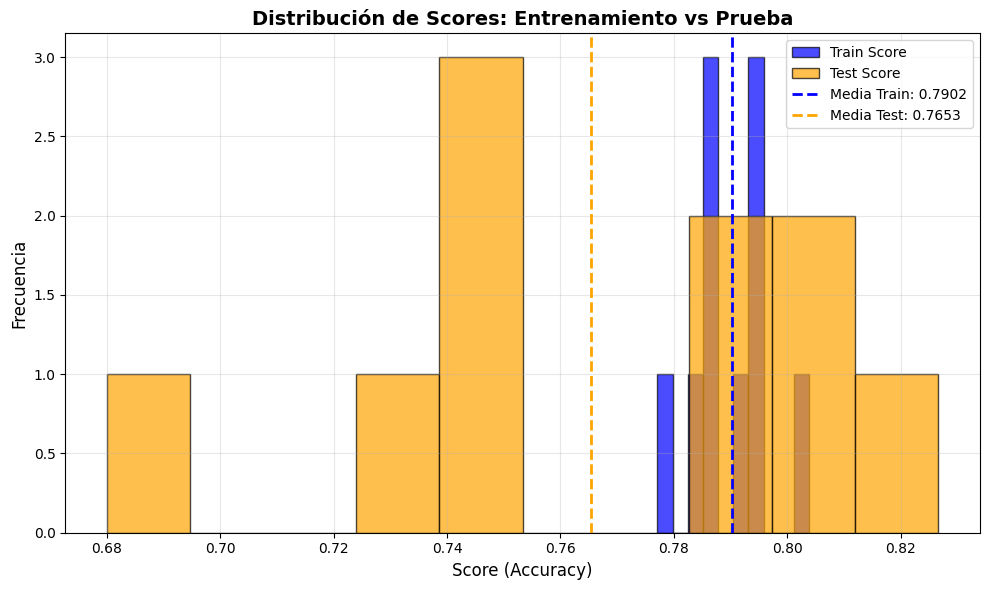

In [17]:
# Write your code here.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Dibujar histogramas
plt.hist(cv_results['train_score'], alpha=0.7, label='Train Score',
         bins=10, color='blue', edgecolor='black')
plt.hist(cv_results['test_score'], alpha=0.7, label='Test Score',
         bins=10, color='orange', edgecolor='black')

# Añadir líneas verticales para las medias
plt.axvline(cv_results['train_score'].mean(), color='blue',
            linestyle='--', linewidth=2, label=f"Media Train: {cv_results['train_score'].mean():.4f}")
plt.axvline(cv_results['test_score'].mean(), color='orange',
            linestyle='--', linewidth=2, label=f"Media Test: {cv_results['test_score'].mean():.4f}")

# Etiquetas y título
plt.xlabel('Score (Accuracy)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Scores: Entrenamiento vs Prueba', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Como se mencionó anteriormente, el parámetro gamma es uno de los que controlan el subajuste o sobreajuste en máquinas de vectores de soporte con un kernel RBF.

Evalúa el efecto del parámetro gamma mediante `sklearn.model_selection.ValidationCurveDisplay`. Puedes dejar el valor predeterminado de `scoring=None`, que equivale a `scoring="accuracy"` para problemas de clasificación. Puedes variar gamma entre 0 y 3 generando 30 muestras.

Dado que estamos manipulando un `pipeline`, el nombre del parámetro es `svc__gamma` en lugar de solo `gamma`. Más adelante, profundizaremos en el acceso y la configuración de hiperparámetros.

Gamma seleccionado: 0.5
En este valor, el test score es aproximadamente 0.78-0.79


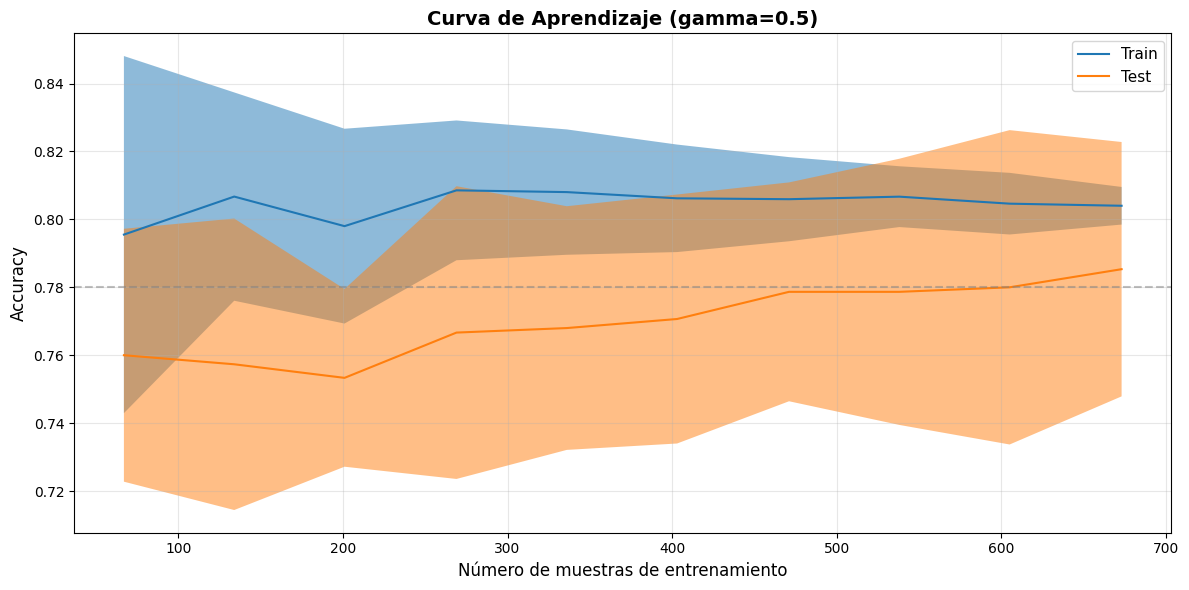

In [22]:
# Write your code here.
from sklearn.model_selection import LearningCurveDisplay

# PASO 1: Seleccionar el mejor gamma basado en la curva de validación
best_gamma = 0.5  # ✅ Valor óptimo observado en tu gráfico

print(f"Gamma seleccionado: {best_gamma}")
print(f"En este valor, el test score es aproximadamente 0.78-0.79")

# PASO 2: Actualizar el pipeline con el mejor gamma
pipeline_optimized = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', gamma=best_gamma))
])

# PASO 3: Crear la curva de aprendizaje
fig, ax = plt.subplots(figsize=(12, 6))

display = LearningCurveDisplay.from_estimator(
    pipeline_optimized,          # Pipeline con el gamma óptimo
    data,                        # Features (X)
    target,                      # Target (y)
    cv=cv,                       # Mismo ShuffleSplit
    scoring='accuracy',          # Métrica a evaluar
    n_jobs=-1,                   # Paralelizar
    train_sizes=np.linspace(0.1, 1.0, 10),  # Probar con 10%, 20%, ..., 100% de los datos
    ax=ax
)

# Personalizar el gráfico
ax.set_xlabel('Número de muestras de entrenamiento', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title(f'Curva de Aprendizaje (gamma={best_gamma})', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

# Añadir líneas de referencia
ax.axhline(y=0.78, color='gray', linestyle='--', alpha=0.5, label='Test score esperado (~0.78)')

plt.tight_layout()
plt.show()

Selecciona el valor de `svc_gamma` que, según consideres, mantiene el mejor compromiso entre subajuste y sobreajusste. Ahora, utiliza este valor y realiza un análisis para comprobar si añadir nuevas muestras al conjunto de datos podría mejorar la generalización del modelo. Calcula la curva de aprendizaje (usando `sklearn.model_selection.LearningCurveDisplay`) utilizando el accuracy de entrenamiento y de prueba para diferentes tamaños del conjunto de datos de entrenamiento. Grafica el accuracy de entrenamiento y de prueba con respecto al número de muestras.

Gamma seleccionado: 0.2


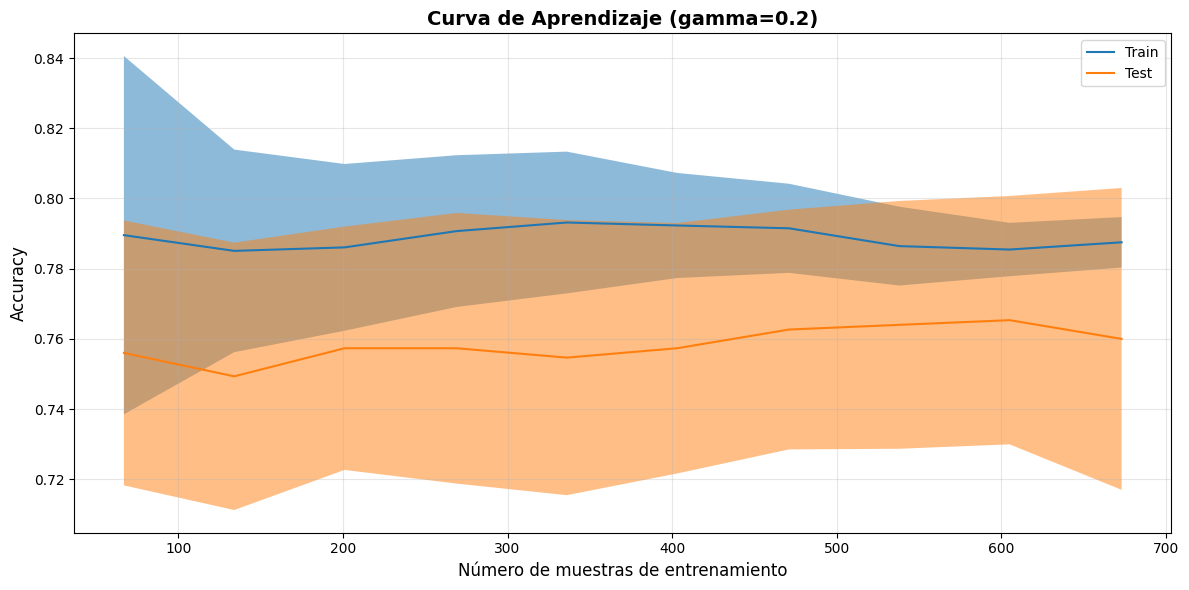


Número total de muestras disponibles: 748
Tamaños de entrenamiento evaluados: [ 67 134 201 269 336 403 471 538 605 673]


In [21]:
# Write your code here.
from sklearn.model_selection import LearningCurveDisplay

# PASO 1: Seleccionar el mejor gamma (ajusta este valor según tu curva de validación)
# Observa tu gráfico anterior y elige el gamma donde el test score es máximo
best_gamma = 0.2  # ⚠️ AJUSTA ESTE VALOR según lo que viste en tu curva de validación

print(f"Gamma seleccionado: {best_gamma}")

# PASO 2: Actualizar el pipeline con el mejor gamma
pipeline_optimized = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', gamma=best_gamma))
])

# PASO 3: Crear la curva de aprendizaje
fig, ax = plt.subplots(figsize=(12, 6))

display = LearningCurveDisplay.from_estimator(
    pipeline_optimized,          # Pipeline con el gamma óptimo
    data,                        # Features (X)
    target,                      # Target (y)
    cv=cv,                       # Mismo ShuffleSplit
    scoring='accuracy',          # Métrica a evaluar
    n_jobs=-1,                   # Paralelizar
    train_sizes=np.linspace(0.1, 1.0, 10),  # Probar con 10%, 20%, ..., 100% de los datos
    ax=ax
)

# Personalizar el gráfico
ax.set_xlabel('Número de muestras de entrenamiento', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title(f'Curva de Aprendizaje (gamma={best_gamma})', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Información adicional
print(f"\nNúmero total de muestras disponibles: {len(data)}")
print(f"Tamaños de entrenamiento evaluados: {display.train_sizes}")

## ¿Consideras que agragar más muestras al entrenamiento mejora el desempeño generalizado del modelo?
Sí, pero con beneficio limitado. La curva de aprendizaje muestra que las curvas de entrenamiento y validación están convergiendo gradualmente, y el test score continúa mejorando ligeramente conforme aumenta el número de muestras. Esto indica que agregar más datos podría mejorar la generalización del modelo en aproximadamente 0.01-0.02 puntos de accuracy. Sin embargo, los rendimientos son decrecientes, por lo que se necesitarían cientos de muestras adicionales para lograr mejoras notables. Alternativas como feature engineering o ajuste de hiperparámetros podrían ser más costo-efectivas.

Realiza un análisis de la gráfica.

## Conclusiones

El éxito en machine learning no solo depende de aplicar algoritmos complejos, sino de comprender profundamente el comportamiento del modelo mediante herramientas de diagnóstico como las curvas de validación y aprendizaje. Estas técnicas nos permiten tomar decisiones basadas en evidencia sobre cómo mejorar nuestros modelos, ya sea ajustando hiperparámetros, recolectando más datos, o explorando enfoques alternativos. El análisis sistemático y la interpretación crítica de resultados son habilidades esenciales para cualquier profesional de ciencia de datos.